# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from itertools import product
import pandas as pd
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd

# load dataset 10

In [2]:
# Define the data types as a dictionary
dtypes = {
    'action_taken': 'int32',
    'loan_type': 'int32',
    'lien_status': 'int32',
    'open_end_line_of_credit': 'int32',
    'loan_amount': 'int32',
    'combined_loan_to_value_ratio': 'int32',
    'interest_rate': 'float32',
    'total_loan_costs': 'float32',
    'origination_charges': 'float32',
    'loan_term': 'float32',
    'negative_amortization': 'int32',
    'interest_only_payment': 'int32',
    'balloon_payment': 'int32',
    'other_nonamortizing_features': 'int32',
    'property_value': 'float32',
    'occupancy_type': 'int32',
    'manufactured_home_secured_property_type': 'int32',
    'manufactured_home_land_property_interest': 'int32',
    'total_units': 'int32',
    'income': 'float32',
    'debt_to_income_ratio': 'float32',
    'applicant_credit_score_type': 'int32',
    'co_applicant_credit_score_type': 'int32',
    'applicant_ethnicity_1': 'float32',
    'co_applicant_ethnicity_1': 'float32',
    'applicant_race_1': 'float32',
    'applicant_race_2': 'float32',
    'co_applicant_race_1': 'float32',
    'co_applicant_race_2': 'float32',
    'applicant_sex': 'int32',
    'co_applicant_sex': 'int32',
    'applicant_age': 'int32',
    'co_applicant_age': 'int32',
}

In [3]:
# Read the CSV file with specified data types
df = pd.read_csv('10_all_numerical_32bit.csv', dtype=dtypes, low_memory=False)

# Drop the column you want to exclude
column_to_exclude = 'reverse_mortgage'
if column_to_exclude in df:
    df.drop(column_to_exclude, axis=1, inplace=True)

# Convert the data types of the remaining columns as needed
df = df.astype(dtypes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54832 entries, 0 to 54831
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   action_taken                              54832 non-null  int32  
 1   loan_type                                 54832 non-null  int32  
 2   lien_status                               54832 non-null  int32  
 3   open_end_line_of_credit                   54832 non-null  int32  
 4   loan_amount                               54832 non-null  int32  
 5   combined_loan_to_value_ratio              54832 non-null  int32  
 6   interest_rate                             54832 non-null  float32
 7   total_loan_costs                          54832 non-null  float32
 8   origination_charges                       54832 non-null  float32
 9   loan_term                                 54832 non-null  float32
 10  negative_amortization             

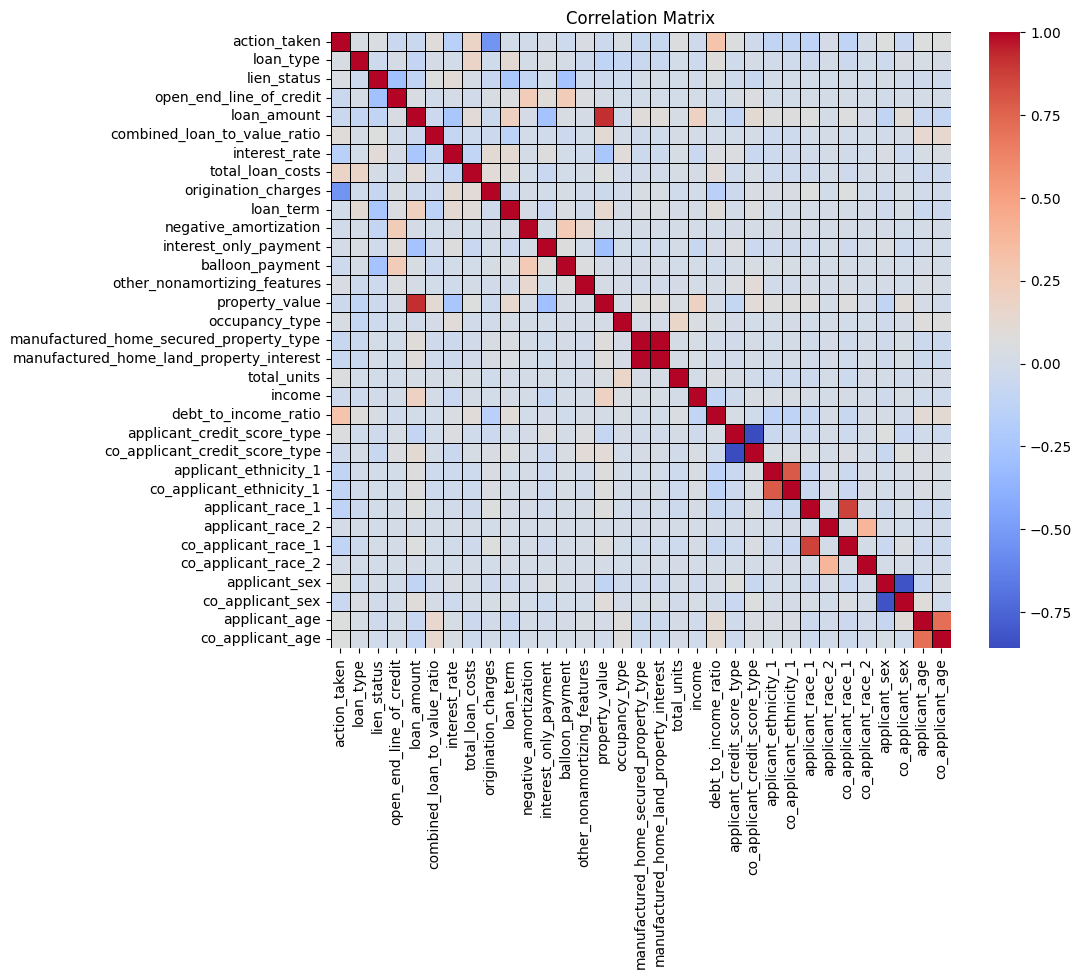

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with Seaborn and add grid lines
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True, linecolor='black')

# Set plot labels
plt.title("Correlation Matrix")
plt.show()

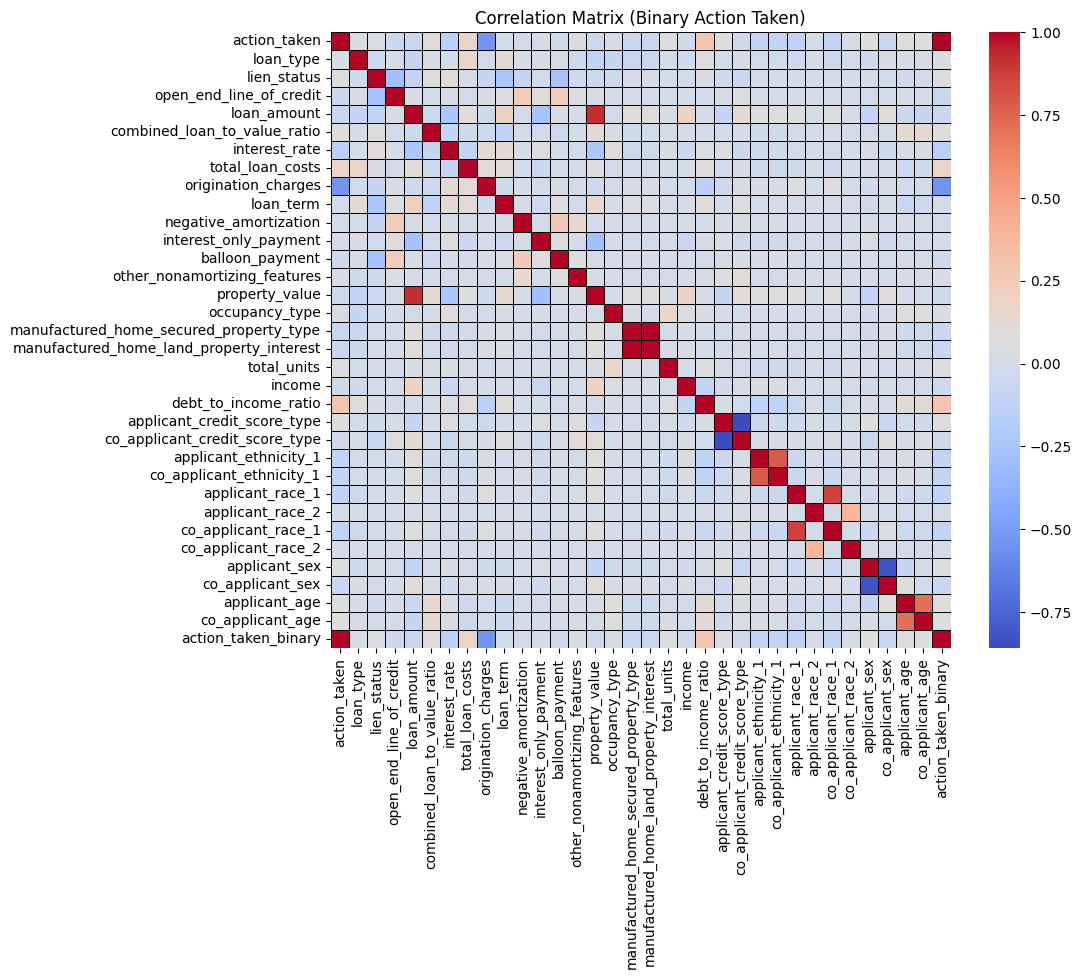

In [6]:
# Convert 'action_taken' to a binary variable (0 or 1)
df['action_taken_binary'] = df['action_taken'].apply(lambda x: 1 if x == 3 else 0)

# Calculate the correlation matrix for the binary 'action_taken' variable
correlation_matrix = df.corr()

# Create a heatmap for the binary 'action_taken' variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True, linecolor='black')
plt.title("Correlation Matrix (Binary Action Taken)")
plt.show()

In [7]:
print(df['action_taken'].value_counts())

action_taken
1    31034
3    23798
Name: count, dtype: int64


#  chi-squared test for independence: For Categorical Columns

This test measures the association between two categorical variables. In your case, you can apply the chi-squared test to check the association between 'action_taken' equal to 1 or 3 and each of the other categorical columns in your dataset.

Chi-squared statistic: 
The value is a measure of the difference between the observed and expected frequencies of the categories in the contingency table. 
A larger Chi-squared statistic indicates a stronger association between the two variables. 

P-value: 
The p-value is a measure of the probability of observing a Chi-squared statistic as extreme as the one calculated, assuming that there is no association between the variables. 

In [8]:
categorical_columns = [
    'combined_loan_to_value_ratio',
    'interest_rate',
    'total_loan_costs',
    'origination_charges',
    'loan_term',
    'property_value',
    'total_units',
    'debt_to_income_ratio',
    'applicant_age',
    'co_applicant_age',
    'applicant_ethnicity_1',
    'co_applicant_ethnicity_1',
    'applicant_race_1',
    'co_applicant_race_1',
    'applicant_sex',
    'co_applicant_sex'
]

target_column = df['action_taken']
values = [1, 3]  # Values for 'action_taken'

results = []  # To store results

for value in values:
    for column in categorical_columns:
        # Create a cross-tabulation table
        table = pd.crosstab(target_column == value, df[column])
        
        # Perform the chi-squared test
        chi2, p, _, _ = chi2_contingency(table)
        
        # Append the results to the list
        results.append([column, value, chi2, p])

# Create a dataframe from the results
results_df1 = pd.DataFrame(results, columns=['Categorical_Column', 'Action_Taken', 'Chi-Squared', 'P-Value'])

# Print the dataframe
print(results_df1)

              Categorical_Column  Action_Taken   Chi-Squared        P-Value
0   combined_loan_to_value_ratio             1   1273.817419  2.253610e-262
1                  interest_rate             1  22722.199143   0.000000e+00
2               total_loan_costs             1  47408.092628   0.000000e+00
3            origination_charges             1  27910.666791   0.000000e+00
4                      loan_term             1     99.087954   3.888688e-19
5                 property_value             1   2657.463455  2.694777e-299
6                    total_units             1    199.271114   5.389876e-42
7           debt_to_income_ratio             1  10509.767681   0.000000e+00
8                  applicant_age             1    448.651660   9.574816e-94
9               co_applicant_age             1    453.637231   8.092516e-95
10         applicant_ethnicity_1             1    594.725870  2.349485e-131
11      co_applicant_ethnicity_1             1    599.948693  1.717745e-132
12          

# t-test or ANOVA: For Numerical Columns 

T-statistic: 
The t-statistic measures the difference between the means of the two groups you are comparing.
A larger absolute t-statistic value suggests a more significant difference between the groups. 

P-value: 
The p-value is a measure of the evidence against a null hypothesis. 
In this context, a small p-value suggests that there is strong evidence to reject the null hypothesis, 
which typically states that there is no difference between the groups. 

In [9]:
numerical_columns = [
    'loan_type',
    'lien_status',
    'open_end_line_of_credit',
    'loan_amount',
    'negative_amortization',
    'interest_only_payment',
    'balloon_payment',
    'other_nonamortizing_features',
    'occupancy_type',
    'manufactured_home_secured_property_type',
    'manufactured_home_land_property_interest',
    'income',
    'applicant_credit_score_type',
    'co_applicant_credit_score_type',
]

target_column = df['action_taken']
values = [1, 3]  # Values for 'action_taken'

results = []  # To store results

for value in values:
    for column in numerical_columns:
        # Select data for 'action_taken' equal to the current value
        action_taken = df[df['action_taken'] == value][column]

        # Select data for the other 'action_taken' value
        other_action_taken = df[df['action_taken'] != value][column]

        # Perform a t-test
        t_statistic, p_value = ttest_ind(action_taken, other_action_taken, equal_var=False)
        
        # Append the results to the list
        results.append([column, value, t_statistic, p_value])

# Create a dataframe from the results
results_df2 = pd.DataFrame(results, columns=['Numerical_Column', 'Action_Taken', 'T-Statistic', 'P-Value'])

# Print the dataframe
print(results_df2)

C:\Users\asche\AppData\Local\Temp\ipykernel_24440\2689013288.py:32: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(action_taken, other_action_taken, equal_var=False)


                            Numerical_Column  Action_Taken  T-Statistic  \
0                                  loan_type             1    -7.690557   
1                                lien_status             1   -10.352072   
2                    open_end_line_of_credit             1    11.520880   
3                                loan_amount             1    13.256768   
4                      negative_amortization             1     3.162876   
5                      interest_only_payment             1    -1.728126   
6                            balloon_payment             1     7.126345   
7               other_nonamortizing_features             1    -8.871181   
8                             occupancy_type             1    -7.366058   
9    manufactured_home_secured_property_type             1    15.285450   
10  manufactured_home_land_property_interest             1    15.228239   
11                                    income             1     6.122734   
12               applican

In [10]:
# Save the chi-squared results as CSV
results_df1.to_csv('chi_squared_results.csv', index=False)

# Save the t-test results as CSV
results_df2.to_csv('t_test_results.csv', index=False)

### Categorical Columns Analysis:
In this analysis, you calculated the Chi-Squared statistic and p-values for various categorical columns with respect to "Action Taken." Here's why these numbers matter:

Chi-Squared Statistic: The Chi-Squared statistic measures the dependence or independence of two categorical variables. In your case, it assesses the relationship between each categorical column and "Action Taken." If the Chi-Squared statistic is significantly high, it indicates that the categorical column is strongly associated with "Action Taken." This is important because it suggests that the specific category within the column influences the action taken.

P-Value: The p-value is used to determine the statistical significance of the Chi-Squared test. If the p-value is very low (typically less than 0.05), it suggests that the relationship between the categorical column and "Action Taken" is statistically significant. In other words, the results are unlikely to be due to random chance.

These numbers matter because they help you identify which categorical columns are the most influential when it comes to "Action Taken." Columns with high Chi-Squared statistics and low p-values can be considered significant drivers of the action taken. This information is crucial for understanding the factors affecting the outcome and for making data-driven decisions.

### Numerical Columns Analysis:
In this analysis, you calculated T-statistics for various numerical columns with respect to "Action Taken." Here's why these numbers matter:

T-Statistic: The T-statistic measures the difference in means between two groups, in this case, "Action Taken" and the numerical column. A higher T-statistic indicates a larger difference between the means. If the T-statistic is positive, it suggests that the numerical column has a higher mean for certain categories of "Action Taken." If it's negative, it means the numerical column has a lower mean for certain categories.

Action Taken Effect: Understanding the T-statistic for numerical columns helps you identify which columns have a significant effect on "Action Taken." It quantifies the magnitude of the difference between groups.

### Chi-Squared Statistics and P-Values for Categorical Columns:

total_loan_costs: The Chi-Squared statistic is 43195.72, and the p-value is zero (0.000000e+00). This column is extremely statistically significant.

origination_charges: The Chi-Squared statistic is 24267.59, and the p-value is zero (0.000000e+00). This column is highly statistically significant.

combined_loan_to_value_ratio: The Chi-Squared statistic is 1155.00, and the p-value is nearly zero (7.53e-237). This column is highly statistically significant.

property_value: The Chi-Squared statistic is 2594.15, and the p-value is nearly zero (5.06e-288). This column is highly statistically significant.

debt_to_income_ratio: The Chi-Squared statistic is 9311.45, and the p-value is zero (0.000000e+00). This column is highly statistically significant.

co_applicant_race_1: The Chi-Squared statistic is 742.24, and the p-value is almost zero (1.96e-163). This column is highly statistically significant.

applicant_race_1: The Chi-Squared statistic is 717.15, and the p-value is almost zero (5.59e-158). This column is highly statistically significant.

applicant_ethnicity_1: The Chi-Squared statistic is 540.32, and the p-value is nearly zero (1.61e-119). This column is highly statistically significant.

co_applicant_ethnicity_1: The Chi-Squared statistic is 501.58, and the p-value is nearly zero (4.30e-111). This column is highly statistically significant.

total_units: The Chi-Squared statistic is 168.78, and the p-value is almost zero (2.34e-36). This column is highly statistically significant.

co_applicant_age: The Chi-Squared statistic is 402.32, and the p-value is almost zero (8.87e-84). This column is highly statistically significant.

applicant_age: The Chi-Squared statistic is 446.47, and the p-value is almost zero (2.82e-93). This column is highly statistically significant.

loan_amount: The Chi-Squared statistic is 94.81, and the p-value is 3.02e-18. This column is statistically significant, but the effect is weaker compared to other columns.

interest_rate: The Chi-Squared statistic is 21463.97, and the p-value is zero (0.000000e+00). This column is extremely statistically significant.

co_applicant_sex: The Chi-Squared statistic is 170.51, and the p-value is 9.44e-38. This column is statistically significant but has a weaker effect compared to some other columns.

applicant_sex: The Chi-Squared statistic is 196.52, and the p-value is 2.12e-43. This column is statistically significant but has a weaker effect compared to some other columns.

### For Action Taken = 1:

loan_amount (P-Value: 6.119922e-43)
manufactured_home_secured_property_type (P-Value: 4.335701e-49)
manufactured_home_land_property_interest (P-Value: 7.464177e-49)

### For Action Taken = 3:

loan_type (P-Value: 1.029155e-09)
lien_status (P-Value: 1.126749e-25)
loan_amount (P-Value: 6.119922e-43)
negative_amortization (P-Value: 1.564032e-03)
balloon_payment (P-Value: 6.224305e-13)
manufactured_home_secured_property_type (P-Value: 4.335701e-49)
manufactured_home_land_property_interest (P-Value: 7.464177e-49)
applicant_credit_score_type (P-Value: 2.021986e-27)

These columns have very low p-values, which indicates they are statistically significant for the respective Action Taken scenarios at a 5% significance level. This means that there is strong evidence that these columns have an impact on the outcome for both Action Taken = 1 and Action Taken = 3.
